# Analisis Data Kriminalitas 2008-2016 di London 

In [1]:
#Datasets: London Crime Data, 2008-2016
#Crime in major metropolitan areas, such as London, occurs in distinct patterns from Jan 2008-Dec 2016. This data covers the number of criminal reports by month, LSOA borough, and major/minor category.

import numpy as np
import pandas as pd

### Q : Bagaimana Kriminalitas di London selama 2008-2016?

#### Import Dataset

In [2]:
df = pd.read_csv('C:/Users/W I N D O W S/Downloads/Hacktiv8 2022/london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
#Keterangan:
# lsoa_code: code for Lower Super Output Area in Greater London.
# borough: Common name for London borough.
# major_category: High level categorization of crime
# minor_category: Low level categorization of crime within major category.
# value: monthly reported count of categorical crime in given borough
# year: Year of reported counts, 2008-2016
# month: Month of reported counts, 1-12

#### Informasi Dasar

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


#### Daftar Index

In [6]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

#### Dimensi Dataframe

In [7]:
df.shape

(13490604, 7)

#### Drop Kolom

In [8]:
df.drop(['lsoa_code'], axis=1, inplace=True) #axis=1 represent columns
df.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


#### Checking Null

In [9]:
df.isnull().sum()

borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

#### Data Selection

In [10]:
#Dikarenakan kategori kriminalitas pada tiap observasi minimal terdapat 1 kategori (minor), maka:
df = df[df["value"] >= 1]

In [11]:
df

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...
13490581,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,Lewisham,Violence Against the Person,Common Assault,2,2013,7


#### Statistika Deskriptif

In [12]:
df.describe()

,value,year,month
count,3.419099e+06,3.419099e+06,3.419099e+06
mean,1.885806e+00,2.011991e+03,6.511021e+00
std,3.118902e+00,2.602550e+00,3.422459e+00
min,1.000000e+00,2.008000e+03,1.000000e+00
25%,1.000000e+00,2.010000e+03,4.000000e+00
50%,1.000000e+00,2.012000e+03,7.000000e+00
75%,2.000000e+00,2.014000e+03,9.000000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [13]:
df

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...
13490581,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,Lewisham,Violence Against the Person,Common Assault,2,2013,7


## Visualizing using Matplotlib

In [14]:
#import matplotlib
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

print(plt.style.available)
mpl.style.use('ggplot') # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Line Chart

In [15]:
df2=df[['borough','value']]
df2

,borough,value
9,Sutton,1
16,Barking and Dagenham,1
24,Ealing,2
25,Hackney,1
32,Bromley,1
...,...,...
13490581,Bromley,3
13490584,Lewisham,1
13490590,Greenwich,1
13490592,Lewisham,2


In [16]:
Tahun=df.sort_values(by='year',ascending=True)['year'].unique()
Total=df.groupby('year').sum()['value'].to_numpy()
Tahun

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [17]:
Total

array([738641, 717214, 715324, 724915, 737329, 686407, 680183, 711624,
       736121], dtype=int64)

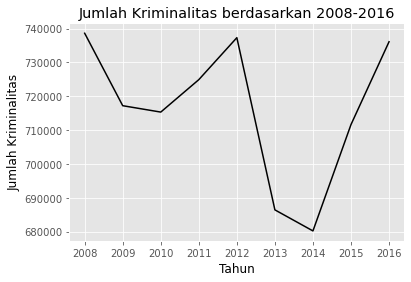

In [18]:
plt.xticks(np.arange(len(Tahun)),Tahun)
plt.plot(Total,color='black')

plt.title('Jumlah Kriminalitas berdasarkan 2008-2016')
plt.ylabel('Jumlah Kriminalitas',color='black')
plt.xlabel('Tahun',color='black')

plt.show()

In [19]:
#Kesimpulan: Jumlah kriminalitas tertinggi terlihat pada tahun 2012 dan 2016, sedangkan terendah terlihat pada tahun 2014

### Area Chart

In [20]:
df.set_index('year', inplace=True)

In [21]:
df

,borough,major_category,minor_category,value,month
year,,,,,
2016,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,8
2009,Barking and Dagenham,Theft and Handling,Other Theft Person,1,5
2012,Ealing,Theft and Handling,Other Theft Person,2,1
2013,Hackney,Violence Against the Person,Harassment,1,2
2016,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,4
...,...,...,...,...,...
2009,Bromley,Violence Against the Person,Harassment,3,12
2015,Lewisham,Violence Against the Person,Assault with Injury,1,10
2012,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,4


In [22]:
df_top5 = pd.crosstab(df.index, df['value'].sort_values(ascending=False)).transpose().head()
df_top5

row_0,2008,2009,2010,2011,2012,2013,2014,2015,2016
value,,,,,,,,,
1,244536,239698,237273,237625,237104,228830,231652,239422,245649
2,81844,80058,79048,78633,78400,75666,77668,79454,81707
3,31480,30994,30984,30483,30335,29250,29916,30486,31573
4,13784,13317,13176,13179,13208,12765,12936,13432,13686
5,6758,6580,6444,6644,6578,6264,6322,6593,6638


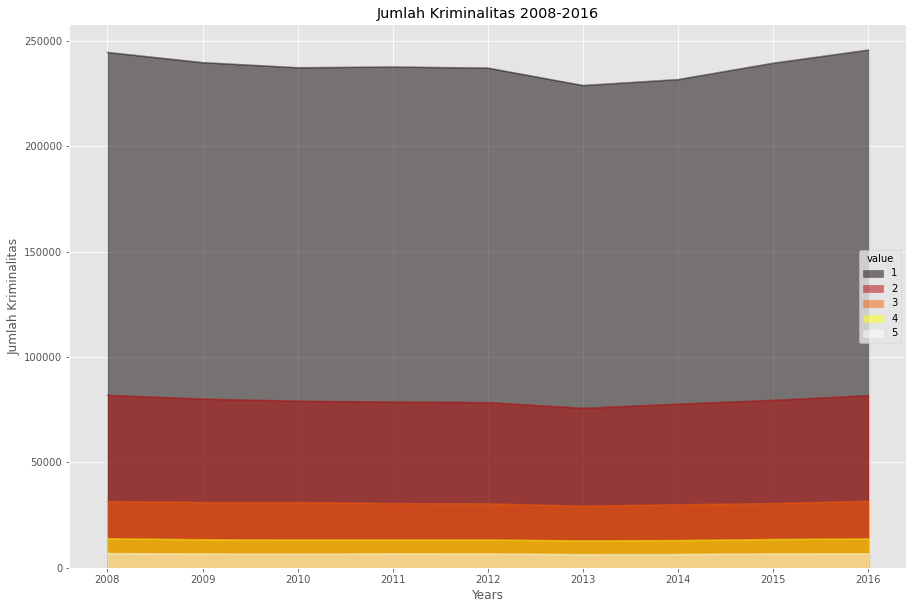

In [23]:
df_top5.transpose().plot(kind='area',stacked=False,figsize=(15,10), cmap='hot')

plt.title('Jumlah Kriminalitas 2008-2016')
plt.ylabel('Jumlah Kriminalitas')
plt.xlabel('Years')

plt.show()

In [24]:
#Kesimpulan : Jumlah kategori kriminalitas yang paling banyak adalah value=1, dari tahun 2008 sampai 2016. Namun pada 2008-2009 dan 2012-2014 terdapat penurunan jumlah kriminalitas

### Histogram

In [25]:
df.value.value_counts()

1      2141789
2       712478
3       275501
4       119483
5        58821
        ...   
215          1
216          1
217          1
218          1
309          1
Name: value, Length: 246, dtype: int64

In [26]:
count, bin_edges = np.histogram(df.value)

In [27]:
print(count) 
print(bin_edges)

[3414662    3090     776     272     137      77      43      25      10
       7]
[  1.   31.8  62.6  93.4 124.2 155.  185.8 216.6 247.4 278.2 309. ]


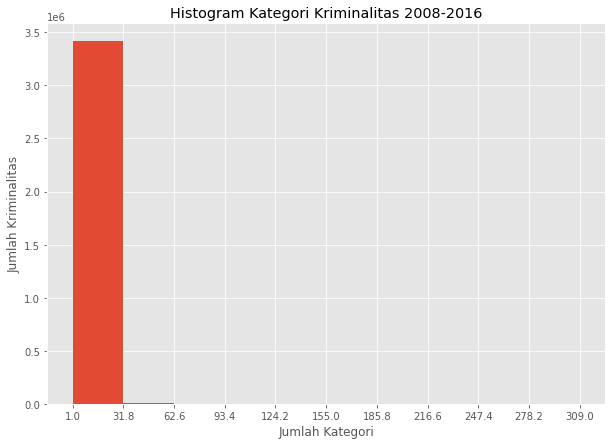

In [28]:
df.value.plot(kind='hist', figsize=(10, 7), xticks=bin_edges)

plt.title('Histogram Kategori Kriminalitas 2008-2016')
plt.ylabel('Jumlah Kriminalitas')
plt.xlabel('Jumlah Kategori')
plt.show()

In [29]:
#Gambar di atas merangkum kisaran bin dan distribusi frekuensi imigrasi di tahun 2008-2016. Dapat kita lihat:
# 3414662 kategori kriminalitas berkontribusi diantara 1 sampai 31,8 kategori
# 3090 kategori kriminalitas berkontribusi diantara 31,8 sampai 62,6 kategori
# 776 kategori kriminalitas berkontribusi diantara 62,6 sampai 93,4 kategori, and so on..
#Sumbu x menunjukkan kisaran kategori kriminalitas dalam interval 30,8.

### Bar Chart

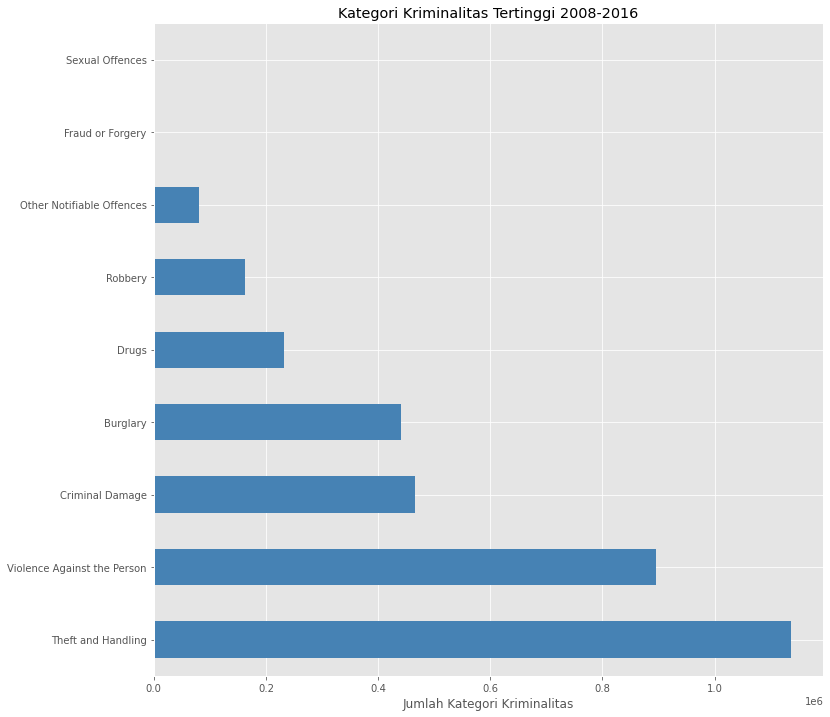

In [30]:
df.major_category.value_counts().plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Jumlah Kategori Kriminalitas')
plt.title('Kategori Kriminalitas Tertinggi 2008-2016')

plt.show()

In [31]:
#Kesimpulan : kategori kriminalitas tertinggi ditunjukkan oleh kategori theft dan handling

### Pie Chart

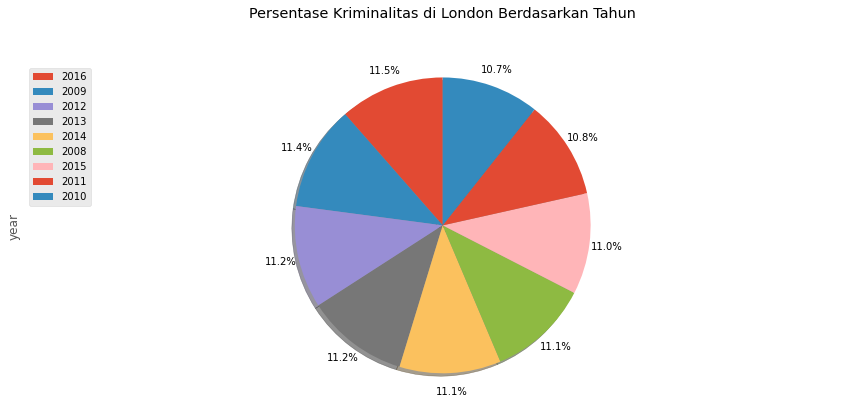

In [32]:
df.index.value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Persentase Kriminalitas di London Berdasarkan Tahun', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df.index.unique(), loc='upper left') 

plt.show()

In [33]:
#Kesimpulan : Jumlah kriminalitas di tiap tahun memiliki persentase yang similar dengan persentase kriminalitas terendah terjadi pada 2010

### Box Plot

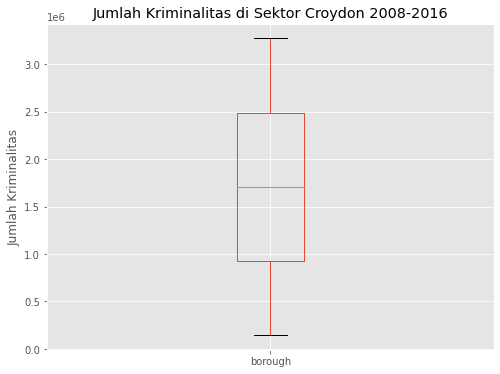

In [34]:
(df['borough']=='Croydon').value_counts().plot(kind='box', figsize=(8, 6))

plt.title('Jumlah Kriminalitas di Sektor Croydon 2008-2016')
plt.ylabel('Jumlah Kriminalitas')

plt.show()

In [35]:
#Kesimpulan :
# Jumlah minimum kriminalitas di Croydon tahun 2008-2016 berkisar di angka 200000 (min), maksimum berkisar 3350000 (max), dan median jumlah kriminalitas berkisar di angka 1750000 (median).
# Kuartil 1 jumlah kriminalitas di Croydon tahun 2008-2016 berkisar di angka ~900000.
# Kuartil 3 jumlah kriminalitas di Croydon tahun 2008-2016 berkisar di angka ~2500000.

### Scatter Plot

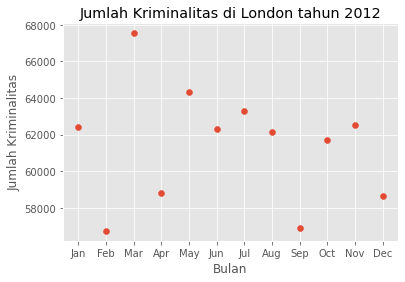

In [36]:
tahun2012=df.loc[2012]
bulan=tahun2012['month'].unique()
bulan.sort()
jumlah_bulan=tahun2012.groupby(['month']).sum()
Values=jumlah_bulan['value'].to_numpy()
nama_bulan=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
n1 = np.arange(len(bulan))
xrange=range(0,12)

plt.scatter(xrange,Values)
plt.title('Jumlah Kriminalitas di London tahun 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kriminalitas')
plt.xticks(n1,nama_bulan)
plt.show()

In [37]:
#Kesimpulan : tidak terdapat tren yang signifikan pada jumlah kriminalitas di London pada tahun 2012. Selain itu, jumlah kriminalitas yang paling jarang ditemukan pada bulan februari dan september serta yang tertinggi pada bulan Maret

### Word Clouds

In [38]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\W I N D O W
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\W I N D O W
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
stopwords = set(STOPWORDS)

In [40]:
df.reset_index(inplace = True)

In [41]:
text=df['minor_category']
text

0               Theft/Taking of Pedal Cycle
1                        Other Theft Person
2                        Other Theft Person
3                                Harassment
4          Criminal Damage To Motor Vehicle
                         ...               
3419094                          Harassment
3419095                 Assault with Injury
3419096       Theft/Taking Of Motor Vehicle
3419097                      Common Assault
3419098                   Personal Property
Name: minor_category, Length: 3419099, dtype: object

In [42]:
data_line = []
for line in text:
    result = re.sub("\n", " ", line)
    data_line.append(result)

In [43]:
data_num = []
for line in data_line:
    result = re.sub("\d", " ", line)
    data_num.append(result)

In [44]:
data_doublespace = []
for line in data_num:
    result = re.sub(r'\s+', " ", line)
    data_doublespace.append(result)

In [45]:
data_casef = []
for line in data_doublespace:
    a = line.lower()
    data_casef.append(a)

In [46]:
data_casef

['theft/taking of pedal cycle',
 'other theft person',
 'other theft person',
 'harassment',
 'criminal damage to motor vehicle',
 'harassment',
 'other theft',
 'theft/taking of motor vehicle',
 'wounding/gbh',
 'theft/taking of motor vehicle',
 'theft from shops',
 'assault with injury',
 'personal property',
 'personal property',
 'burglary in a dwelling',
 'harassment',
 'burglary in other buildings',
 'harassment',
 'burglary in a dwelling',
 'common assault',
 'business property',
 'offensive weapon',
 'assault with injury',
 'going equipped',
 'motor vehicle interference & tampering',
 'personal property',
 'criminal damage to dwelling',
 'personal property',
 'theft from motor vehicle',
 'theft from motor vehicle',
 'other theft',
 'criminal damage to dwelling',
 'assault with injury',
 'other theft',
 'theft from motor vehicle',
 'theft from motor vehicle',
 'wounding/gbh',
 'harassment',
 'criminal damage to motor vehicle',
 'possession of drugs',
 'criminal damage to other b

In [47]:
a = str(data_casef)
word = re.sub(r"'","",a)

In [49]:
crime_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
crime_wc.generate(word)

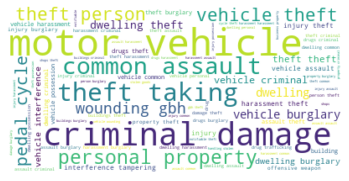

In [50]:
# display the word cloud
plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

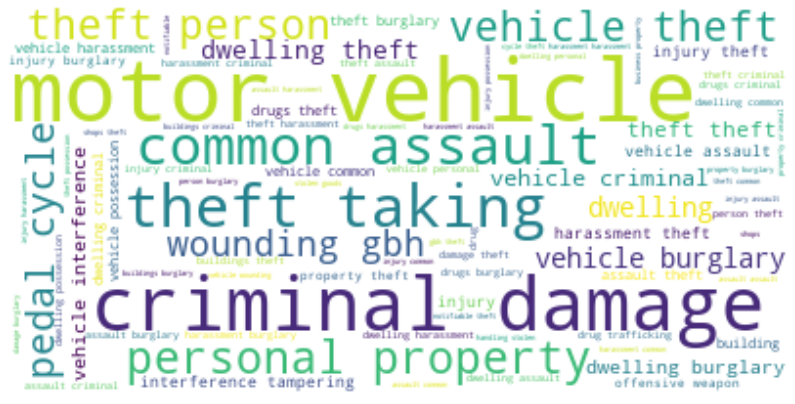

In [51]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
#Kesimpulan : diketahui bahwa kriminalitas minor_category yang paling sering terjadi selama periode 2008-2016 di London adalah theft/taking of motor vehicle, common assault, dan criminal damage

### Folium Maps

In [53]:
import folium

In [54]:
# define the world map centered around London with a low zoom level
london_map = folium.Map(location=[51.509865,-0.118092], zoom_start=8)

# display world map
london_map

In [55]:
# define the world map centered around London with a High zoom level
london_map = folium.Map(location=[51.509865,-0.118092], zoom_start=11)

# display world map
london_map

#### Stamen Toner Maps

In [56]:
# define the world map centered around London with a High zoom level
london_map = folium.Map(location=[51.509865,-0.118092], zoom_start=13, tiles='Stamen Toner')

# display world map
london_map

#### Stamen Terrain Maps

In [57]:
# define the world map centered around London with a High zoom level
london_map = folium.Map(location=[51.509865,-0.118092], zoom_start=13, tiles='Stamen Terrain')

# display world map
london_map

In [58]:
#Untuk membuat peta Choropleth, kita membutuhkan file GeoJSON yang mendefinisikan area / batas negara bagian, kabupaten, atau negara yang kita minati. Dalam kasus kita, karena kita berusaha untuk membuat peta dunia, kita menginginkan sebuah GeoJSON yang mendefinisikan batas-batas semua negara dunia. Unduh file GeoJSON terlebih dahulu.

# download countries geojson file
#!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json

In [59]:
#Sekarang setelah kita memiliki file GeoJSON, mari buat peta dunia, berpusat di sekitar [0, 0] nilai lintang dan bujur, dengan tingkat zoom awal 2, dan menggunakan gaya Mapbox Bright.

world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' # geojson file

# create a plain world map
london_map = folium.Map(location=[51.509865,-0.118092], zoom_start=11, tiles_flat='mapboxbright')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
london_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Jumlah Kriminalitas di London 2008-2016'
)

# display map
london_map

C:\Users\W I N D O W S\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
#Kesimpulan : sektor yang paling banyak terjadi kriminalitas adalah sektor city of westminster, dilanjut city of london dan kensington and chelsea

## Overall analysis

In [ ]:
# Jumlah kriminalitas tertinggi terlihat pada tahun 2012 dan 2016, sedangkan terendah terlihat pada tahun 2014
# Jumlah kategori kriminalitas yang paling banyak adalah value=1, dari tahun 2008 sampai 2016. Namun pada 2008-2009 dan 2012-2014 terdapat penurunan jumlah kriminalitas per kategori
# Kategori kriminalitas tertinggi ditunjukkan oleh kategori theft dan handling
# Berdasarkan visualisasi histogram, jumlah ketegori kriminalitas di London 2008-2016 menunjukkan heavy-tailed distribution dengan positif skewness 
# Tidak terdapat tren yang signifikan pada jumlah kriminalitas di London pada tahun 2012. Selain itu, jumlah kriminalitas yang paling jarang ditemukan pada bulan februari dan september serta yang tertinggi pada bulan Maret
# Jumlah kriminalitas berdasarkan tahun memiliki persentase yang similar dengan persentase kriminalitas terendah terjadi pada 2010
# Sektor yang paling banyak terjadi kriminalitas adalah sektor city of westminster, dilanjut city of london dan kensington and chelsea